
Training a Classifier
=====================

This is it. You have seen how to define neural networks, compute loss and make
updates to the weights of the network.

Now you might be thinking,

What about data?
----------------

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.*Tensor``.

-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful

Specifically for vision, we have created a package called
``torchvision``, that has data loaders for common datasets such as
Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

.. figure:: /_static/img/cifar10.png
   :alt: cifar10

   cifar10


Training an image classifier
----------------------------

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

1. Loading and normalizing CIFAR10
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Using ``torchvision``, it’s extremely easy to load CIFAR10.



Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Assignment/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Assignment


In [0]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1]. Add rotation range and download dataset



In [3]:
import transforme

trainloader = transforme.trainloader
trainloader1 = transforme.trainloader1
testloader =  transforme.testloader
testloader1 = transforme.testloader1
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


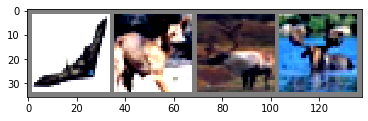

In [4]:
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader1)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

2. Define a Convolution Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [5]:
import modele
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
net = modele.Net().to(device)
summary(net, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           9,216
      BatchNorm2d-10           [-1, 32, 32, 32]              64
             ReLU-11           [-1, 32, 32, 32]               0
          Dropout-12           [-1, 32, 32, 32]               0
        MaxPool2d-13           [-1, 32, 16, 16]               0
           Conv2d-14           [-1

3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum.

In [0]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import torch.nn as nn
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)
#scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1)
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

4. Train the network
^^^^^^^^^^^^^^^^^^^^

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [9]:
import torch
from tqdm import tqdm
import traine
import teste
test_acc = []
train_acc = []
for epoch in range(50):  # loop over the dataset multiple times
    if epoch>10:
      scheduler.step()
    for param_group in optimizer.param_groups:
      print("lr= ",param_group['lr'])
    train_acc.append(traine.train(net, device, trainloader, optimizer, criterion, epoch))
    test_acc.append(teste.test(net, device, testloader))
print('Finished Training')

  0%|          | 0/391 [00:00<?, ?it/s]

lr=  0.1


Epoch= 0 Loss=0.9043042063713074 Batch_id=390 Accuracy=71.25: 100%|██████████| 391/391 [00:15<00:00, 25.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 41.13 %
lr=  0.1


Epoch= 1 Loss=0.9838498830795288 Batch_id=390 Accuracy=65.00: 100%|██████████| 391/391 [00:15<00:00, 25.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 56.33 %
lr=  0.1


Epoch= 2 Loss=0.8468934893608093 Batch_id=390 Accuracy=68.75: 100%|██████████| 391/391 [00:15<00:00, 24.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 67.16 %
lr=  0.1


Epoch= 3 Loss=0.6345379948616028 Batch_id=390 Accuracy=81.25: 100%|██████████| 391/391 [00:15<00:00, 25.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 67.75 %
lr=  0.1


Epoch= 4 Loss=0.6358309984207153 Batch_id=390 Accuracy=80.00: 100%|██████████| 391/391 [00:15<00:00, 25.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 70.90 %
lr=  0.1


Epoch= 5 Loss=0.7293011546134949 Batch_id=390 Accuracy=72.50: 100%|██████████| 391/391 [00:15<00:00, 29.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 72.13 %
lr=  0.1


Epoch= 6 Loss=0.6350246667861938 Batch_id=390 Accuracy=77.50: 100%|██████████| 391/391 [00:15<00:00, 30.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 72.48 %
lr=  0.1


Epoch= 7 Loss=0.7362300157546997 Batch_id=390 Accuracy=80.00: 100%|██████████| 391/391 [00:15<00:00, 25.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 76.65 %
lr=  0.1


Epoch= 8 Loss=0.4486757218837738 Batch_id=390 Accuracy=86.25: 100%|██████████| 391/391 [00:15<00:00, 24.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77.57 %
lr=  0.1


Epoch= 9 Loss=0.7954472899436951 Batch_id=390 Accuracy=87.50: 100%|██████████| 391/391 [00:14<00:00, 29.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77.98 %
lr=  0.1


Epoch= 10 Loss=0.6556479334831238 Batch_id=390 Accuracy=76.25: 100%|██████████| 391/391 [00:15<00:00, 29.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 75.64 %
lr=  0.1


Epoch= 11 Loss=0.47165074944496155 Batch_id=390 Accuracy=83.75: 100%|██████████| 391/391 [00:15<00:00, 25.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 79.64 %
lr=  0.1


Epoch= 12 Loss=0.6039615869522095 Batch_id=390 Accuracy=86.25: 100%|██████████| 391/391 [00:15<00:00, 24.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 75.50 %
lr=  0.1


Epoch= 13 Loss=0.40558815002441406 Batch_id=390 Accuracy=82.50: 100%|██████████| 391/391 [00:15<00:00, 25.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.02 %
lr=  0.1


Epoch= 14 Loss=0.43891629576683044 Batch_id=390 Accuracy=86.25: 100%|██████████| 391/391 [00:15<00:00, 25.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.72 %
lr=  0.1


Epoch= 15 Loss=0.4482297897338867 Batch_id=390 Accuracy=87.50: 100%|██████████| 391/391 [00:15<00:00, 24.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.23 %
lr=  0.1


Epoch= 16 Loss=0.7033092975616455 Batch_id=390 Accuracy=82.50: 100%|██████████| 391/391 [00:15<00:00, 25.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.07 %
lr=  0.1


Epoch= 17 Loss=0.407179057598114 Batch_id=390 Accuracy=87.50: 100%|██████████| 391/391 [00:15<00:00, 25.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.13 %
lr=  0.1


Epoch= 18 Loss=0.7951329946517944 Batch_id=390 Accuracy=77.50: 100%|██████████| 391/391 [00:15<00:00, 28.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.83 %
lr=  0.1


Epoch= 19 Loss=0.3457123637199402 Batch_id=390 Accuracy=88.75: 100%|██████████| 391/391 [00:15<00:00, 24.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.20 %
lr=  0.05


Epoch= 20 Loss=0.377822607755661 Batch_id=390 Accuracy=82.50: 100%|██████████| 391/391 [00:15<00:00, 29.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.96 %
lr=  0.05


Epoch= 21 Loss=0.2752958834171295 Batch_id=390 Accuracy=92.50: 100%|██████████| 391/391 [00:15<00:00, 28.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.31 %
lr=  0.05


Epoch= 22 Loss=0.3612099289894104 Batch_id=390 Accuracy=91.25: 100%|██████████| 391/391 [00:15<00:00, 24.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.74 %
lr=  0.05


Epoch= 23 Loss=0.4398365616798401 Batch_id=390 Accuracy=82.50: 100%|██████████| 391/391 [00:15<00:00, 29.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.24 %
lr=  0.05


Epoch= 24 Loss=0.3686943054199219 Batch_id=390 Accuracy=87.50: 100%|██████████| 391/391 [00:15<00:00, 25.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.24 %
lr=  0.05


Epoch= 25 Loss=0.34981614351272583 Batch_id=390 Accuracy=90.00: 100%|██████████| 391/391 [00:16<00:00, 24.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.63 %
lr=  0.05


Epoch= 26 Loss=0.3750244975090027 Batch_id=390 Accuracy=91.25: 100%|██████████| 391/391 [00:15<00:00, 28.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.29 %
lr=  0.05


Epoch= 27 Loss=0.449636846780777 Batch_id=390 Accuracy=85.00: 100%|██████████| 391/391 [00:15<00:00, 25.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.83 %
lr=  0.05


Epoch= 28 Loss=0.22980241477489471 Batch_id=390 Accuracy=96.25: 100%|██████████| 391/391 [00:15<00:00, 25.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.95 %
lr=  0.05


Epoch= 29 Loss=0.26939263939857483 Batch_id=390 Accuracy=90.00: 100%|██████████| 391/391 [00:15<00:00, 24.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.49 %
lr=  0.025


Epoch= 30 Loss=0.26862913370132446 Batch_id=390 Accuracy=91.25: 100%|██████████| 391/391 [00:15<00:00, 29.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.92 %
lr=  0.025


Epoch= 31 Loss=0.35284876823425293 Batch_id=390 Accuracy=87.50: 100%|██████████| 391/391 [00:15<00:00, 25.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.66 %
lr=  0.025


Epoch= 32 Loss=0.3620266914367676 Batch_id=390 Accuracy=93.75: 100%|██████████| 391/391 [00:15<00:00, 29.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.91 %
lr=  0.025


Epoch= 33 Loss=0.40698790550231934 Batch_id=390 Accuracy=91.25: 100%|██████████| 391/391 [00:15<00:00, 25.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.49 %
lr=  0.025


Epoch= 34 Loss=0.2718072235584259 Batch_id=390 Accuracy=87.50: 100%|██████████| 391/391 [00:15<00:00, 25.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.96 %
lr=  0.025


Epoch= 35 Loss=0.3097761571407318 Batch_id=390 Accuracy=91.25: 100%|██████████| 391/391 [00:15<00:00, 24.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.75 %
lr=  0.025


Epoch= 36 Loss=0.25782936811447144 Batch_id=390 Accuracy=90.00: 100%|██████████| 391/391 [00:15<00:00, 29.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.84 %
lr=  0.025


Epoch= 37 Loss=0.2583919167518616 Batch_id=390 Accuracy=93.75: 100%|██████████| 391/391 [00:15<00:00, 24.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.99 %
lr=  0.025


Epoch= 38 Loss=0.28816819190979004 Batch_id=390 Accuracy=88.75: 100%|██████████| 391/391 [00:15<00:00, 29.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.35 %
lr=  0.025


Epoch= 39 Loss=0.3347684144973755 Batch_id=390 Accuracy=90.00: 100%|██████████| 391/391 [00:16<00:00, 24.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.89 %
lr=  0.0125


Epoch= 40 Loss=0.3725094795227051 Batch_id=390 Accuracy=90.00: 100%|██████████| 391/391 [00:15<00:00, 24.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.42 %
lr=  0.0125


Epoch= 41 Loss=0.32734090089797974 Batch_id=390 Accuracy=91.25: 100%|██████████| 391/391 [00:15<00:00, 24.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.24 %
lr=  0.0125


Epoch= 42 Loss=0.2772168517112732 Batch_id=390 Accuracy=91.25: 100%|██████████| 391/391 [00:16<00:00, 29.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.77 %
lr=  0.0125


Epoch= 43 Loss=0.19378414750099182 Batch_id=390 Accuracy=90.00: 100%|██████████| 391/391 [00:15<00:00, 29.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.51 %
lr=  0.0125


Epoch= 44 Loss=0.30291053652763367 Batch_id=390 Accuracy=91.25: 100%|██████████| 391/391 [00:15<00:00, 28.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.28 %
lr=  0.0125


Epoch= 45 Loss=0.2546594738960266 Batch_id=390 Accuracy=93.75: 100%|██████████| 391/391 [00:15<00:00, 28.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.22 %
lr=  0.0125


Epoch= 46 Loss=0.16509638726711273 Batch_id=390 Accuracy=93.75: 100%|██████████| 391/391 [00:15<00:00, 24.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.91 %
lr=  0.0125


Epoch= 47 Loss=0.3103877305984497 Batch_id=390 Accuracy=86.25: 100%|██████████| 391/391 [00:15<00:00, 24.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.39 %
lr=  0.0125


Epoch= 48 Loss=0.3811420202255249 Batch_id=390 Accuracy=90.00: 100%|██████████| 391/391 [00:15<00:00, 29.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.71 %
lr=  0.0125


Epoch= 49 Loss=0.2316904515028 Batch_id=390 Accuracy=88.75: 100%|██████████| 391/391 [00:16<00:00, 24.36it/s]
100%|██████████| 79/79 [00:02<00:00, 35.78it/s]

Accuracy of the network on the 10000 test images: 85.20 %
Finished Training


Text(0, 0.5, 'Accuracy')

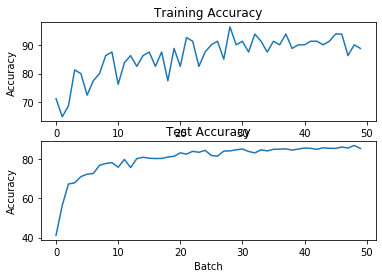

In [10]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)
axs[0].plot(train_acc)
axs[0].set_title("Training Accuracy")
axs[0].set_xlabel("Batch")
axs[0].set_ylabel("Accuracy")
axs[1].plot(test_acc)
axs[1].set_title("Test Accuracy")
axs[1].set_xlabel("Batch")
axs[1].set_ylabel("Accuracy")

5. Test the network on the test data
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:   bird   cat   cat  ship


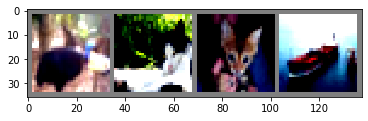

In [11]:
dataiter = iter(testloader1)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:



In [0]:
outputs = net(images.cuda())

The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [13]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   deer   cat   cat  ship


The results seem pretty good.

Let us look at how the network performs on the whole dataset.



That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [14]:
teste.test_categorywise(net, device, testloader, classes)

100%|██████████| 79/79 [00:02<00:00, 31.97it/s]

Accuracy of plane : 100.00 %
Accuracy of   car : 84.62 %
Accuracy of  bird : 84.85 %
Accuracy of   cat : 78.79 %
Accuracy of  deer : 90.32 %
Accuracy of   dog : 61.54 %
Accuracy of  frog : 94.74 %
Accuracy of horse : 82.05 %
Accuracy of  ship : 89.29 %
Accuracy of truck : 72.73 %
